In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

df = pd.read_csv(r'C:\Users\micro\Downloads\sloan-digital-sky-survey\Skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [80]:
df.drop(['objid','specobjid'], axis=1, inplace=True)
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


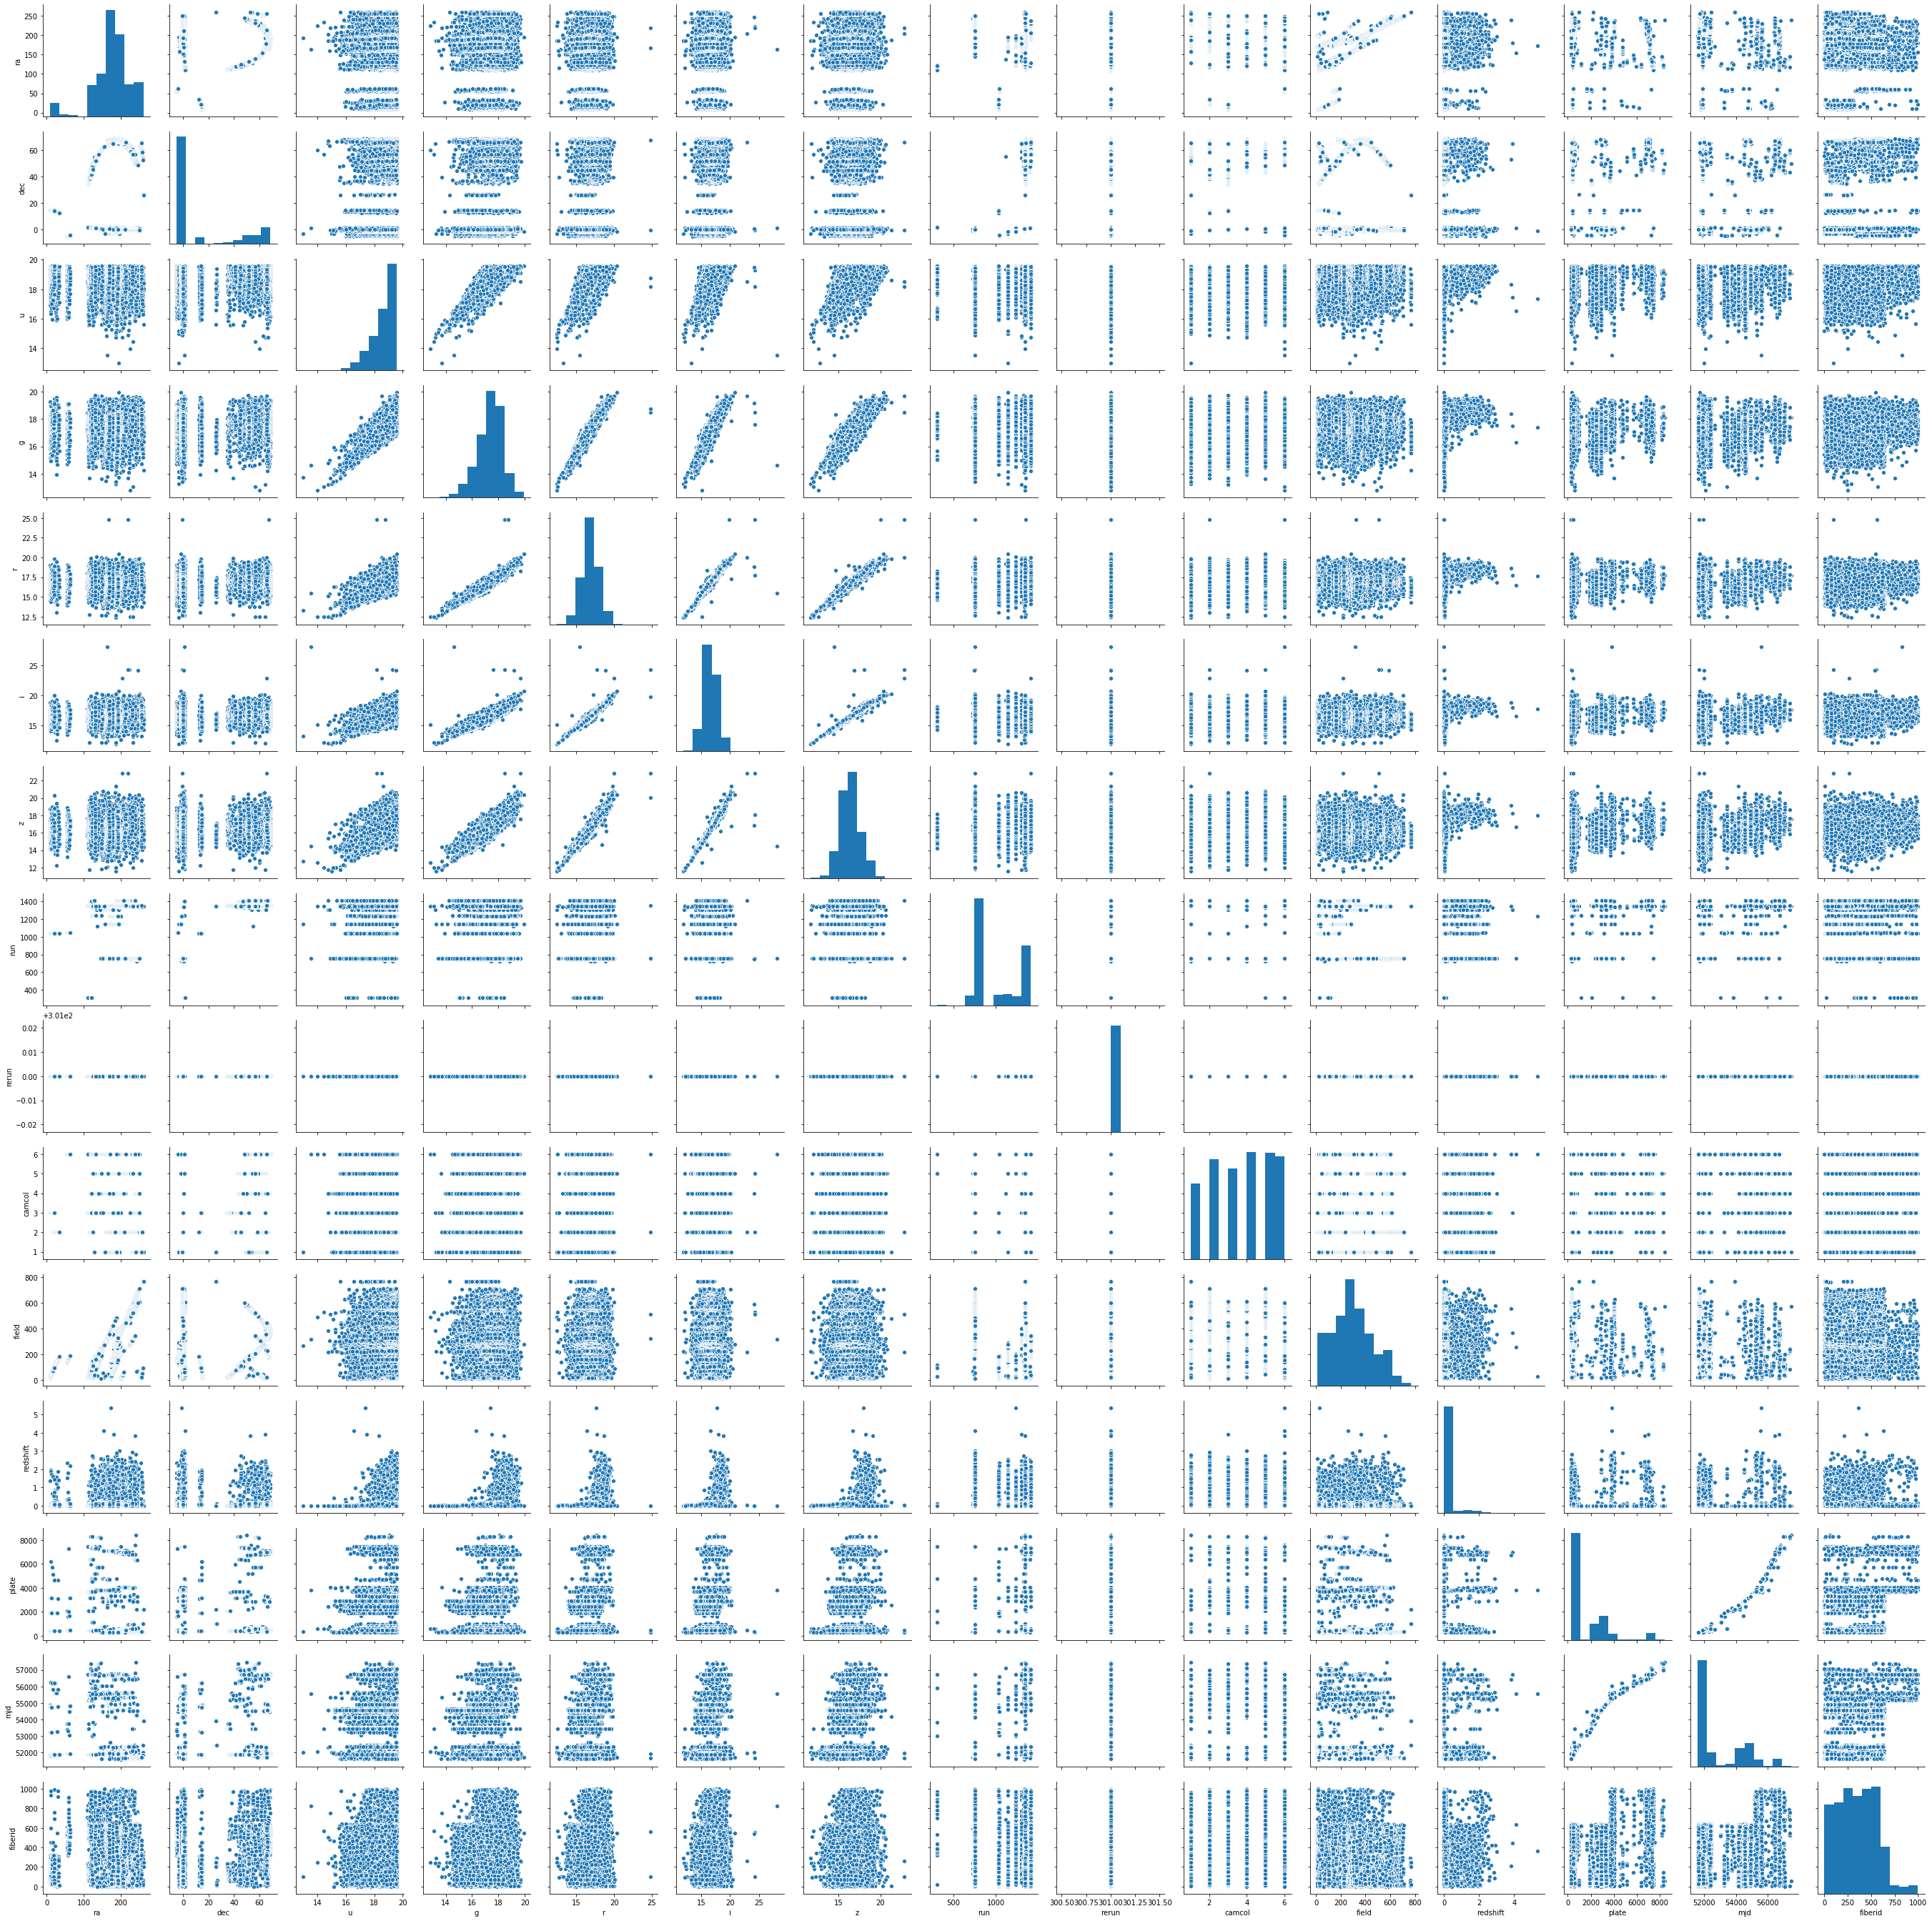

In [81]:
sns.pairplot(df);

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
ra          10000 non-null float64
dec         10000 non-null float64
u           10000 non-null float64
g           10000 non-null float64
r           10000 non-null float64
i           10000 non-null float64
z           10000 non-null float64
run         10000 non-null int64
rerun       10000 non-null int64
camcol      10000 non-null int64
field       10000 non-null int64
class       10000 non-null object
redshift    10000 non-null float64
plate       10000 non-null int64
mjd         10000 non-null int64
fiberid     10000 non-null int64
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [83]:
df.isnull().values.any()

False

In [84]:
df['class'].value_counts(dropna=False).head()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

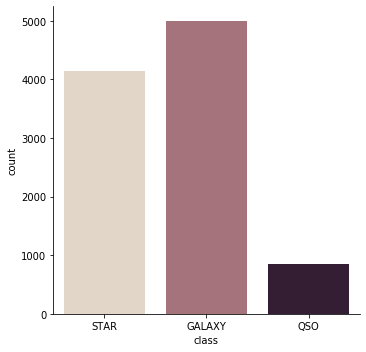

In [85]:
sns.catplot(x="class", kind="count", palette="ch:.25",data=df);

In [86]:
def change_category_to_number(classCat):
    if classCat=='STAR':
        return 0
    elif classCat=='GALAXY':
        return 1
    else:
        return 2
    
df['classCat'] = df['class'].apply(change_category_to_number)
df.drop(['run','rerun','camcol','field','class'],axis=1,inplace=True)
df.head()
    

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,classCat
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512,0


In [87]:
df.dtypes


ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
redshift    float64
plate         int64
mjd           int64
fiberid       int64
classCat      int64
dtype: object

In [88]:
X = df.drop('classCat', axis=1)
y = df['classCat']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.764116,1.641484,0.126818,-0.413546,-0.766553,-0.942443,-1.062479,-0.144581,-0.570199,-0.691137,-0.165135
1,1.011015,-0.621308,0.997418,0.848427,0.758659,0.700740,0.631071,-0.138197,-0.649404,-0.634385,-1.240547
2,1.700460,1.681298,1.074959,0.544496,0.224251,0.077633,-0.014246,-0.029972,-0.623746,-0.770326,-0.184512
3,-0.141483,-0.612137,1.051388,2.068542,2.301013,2.229351,2.041058,5.318764,-0.666695,-0.696417,-1.361652
4,-3.407008,-0.005625,-0.681075,-0.965626,-1.020792,-1.002565,-1.077754,-0.262407,2.634795,2.135243,2.843112


In [91]:
l=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

Logistic Regression: 95.39999999999999


C:\Users\micro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [92]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('SVM:', acc * 100)
l.append(acc)

SVM: 96.6


In [93]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)

Knn: 91.66666666666666


In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Decision Tree:', acc * 100)
l.append(acc)

Decision Tree: 98.63333333333333


In [95]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Naive Bayes:', acc * 100)
l.append(acc)

Naive Bayes: 97.39999999999999


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

Random Forest: 99.03333333333333
[[1215    2    0]
 [   8 1484    5]
 [   0   14  272]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1217
           1       0.99      0.99      0.99      1497
           2       0.98      0.95      0.97       286

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



Text(0.5, 0, 'Accuracy')

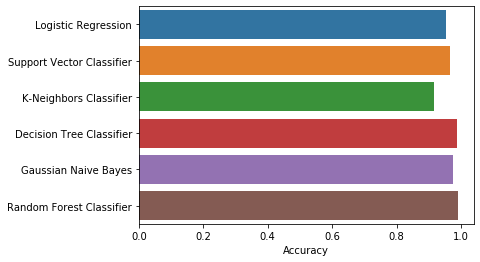

In [97]:
y_axis=['Logistic Regression',
     'Support Vector Classifier',
        'K-Neighbors Classifier',
      'Decision Tree Classifier',
       'Gaussian Naive Bayes',
      'Random Forest Classifier']
x_axis=l
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')